In [2]:
import sympy as sp 
x=sp.Symbol('x')
f =sp.exp(x)*sp.cos(x)
d1f=sp.diff(f,x)
d2f=sp.diff(f,x,2)
d3f=sp.diff(f,x,3)
print('La derivada primera de f es: \n', d1f)
print('La derivada segunda de f es: \n ', d2f)
print('La derivada tercera de f es: \n', d3f)

La derivada primera de f es: 
 -exp(x)*sin(x) + exp(x)*cos(x)
La derivada segunda de f es: 
  -2*exp(x)*sin(x)
La derivada tercera de f es: 
 -2*(sin(x) + cos(x))*exp(x)


In [3]:
import sympy as sp
import numpy as np
x=sp.Symbol('x') # Definimos las variables

f=4*sp.sin(x)*(1+sp.cos(x)) # Creamos la función

d1f=sp.diff(f,x) # Creamos su derivada

d1fn=sp.lambdify(x,d1f) # El lambdify hace que la función sea numérica y no un valor simbólico, por lo que nos permite evaluarla en números flotantes o arrays.

display(f)
display(d1f)
display(d1fn)

x=np.linspace(-np.pi,np.pi,5)
print(d1fn(x))


4*(cos(x) + 1)*sin(x)

(4*cos(x) + 4)*cos(x) - 4*sin(x)**2

<function _lambdifygenerated(x)>

[-5.99903913e-32 -4.00000000e+00  8.00000000e+00 -4.00000000e+00
 -5.99903913e-32]


In [4]:
x,xn=sp.symbols('x,xn')
# Funcion que describe el area de la seccion en funcion del angulo
f=4*sp.sin(x)*(1+sp.cos(x))
d1f=sp.diff(f,x)
d1fn=sp.lambdify(x,d1f)
alphamax=sp.solve(d1f)
print('La sección máxima se alcanza con ángulo: ',float(alphamax[1]))

La sección máxima se alcanza con ángulo:  1.0471975511965979


In [5]:
import numpy as np
maxit=100
eps=1e-4
d2fn=sp.diff(d1f,x)
d2fn=sp.lambdify(x,d2f)
xn=np.pi/2
for i in range(0,maxit):
    res=d1fn(xn)/d2fn(xn)
    xn=xn-res
    if (np.abs(res)<eps):
        break
print('La sección máxima se alcanza con ángulo: ', xn)

La sección máxima se alcanza con ángulo:  0.9650678568332388


In [6]:
# EJEMPLO RESUELTO DE NEWTON-RAPHSON
import sympy as sp
import numpy as np

x,xn=sp.symbols('x,xn')

f=sp.log(sp.tan(x))
fn=sp.lambdify(x,f)
d1fn=sp.diff(f,x)
d1fn=sp.lambdify(x,d1fn)

max_it=100
tol=1e-4
xn=1.5

for i in range(0,max_it):
    res=fn(xn)/d1fn(xn)
    xn=xn-res
    if (np.abs(res)<eps):
        break
print('El valor de la x calculado con el método de Newton-Raphson es: ', xn)


El valor de la x calculado con el método de Newton-Raphson es:  0.7853981633974484


x - x**2/2 + O(x**3)

-x**2/2 + x

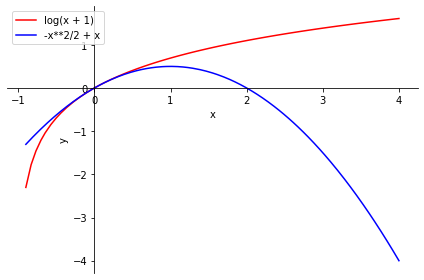

0.0950000000000000

0.0953101798043249

0.000310179804324934

2/(x + 1)**3

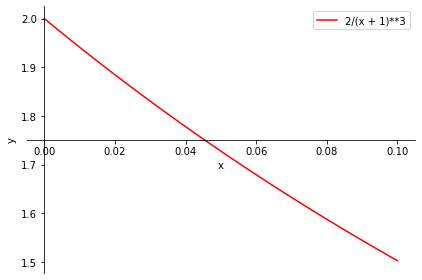

-6/(x + 1)**4

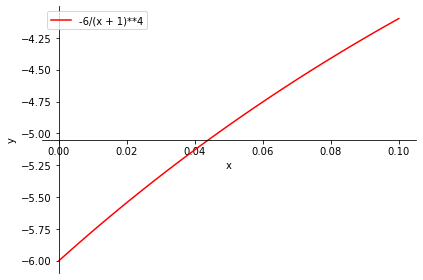

2

1/3000

In [7]:
# EJEMPLO DE LA APLICACIÓN DEL POLINOMIO DE TAYLOR 

import sympy as sp

 

x = sp.symbols('x', real=True)

 

# punto en el que centramos el polinomio de Taylor
x0 = 0

 

# función que queremos aproximar
f = sp.log(1+x)

 

# calculamos el Polinomio de Taylor de grado n centrado en x0
n = 2 # grado del polinomio
P = sp.series(f,x,x0,n+1)
display(P) 
# la O() representa los términos de orden superior que aparecerían en un polinomio de orden superior, por lo que la eliminamos
P=P.removeO()
display(P)

 

p = sp.plot(f, P, (x, -0.9, 4), show=False)
p[0].line_color='r'
p[1].line_color='b'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

 

fL = sp.Lambda((x),f)
PL = sp.Lambda((x),P)

 

display(PL(0.1))
display(fL(0.1))
display(sp.Abs(PL(0.1)-fL(0.1)))

 

fx3 = f.diff(x,3)
display(fx3)

 

p = sp.plot(fx3, (x, 0, 0.1), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

 

fx4 = f.diff(x,4)
display(fx4)

 

p = sp.plot(fx4, (x, 0, 0.1), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

 

supremo = sp.Abs(fx3.subs(x,0))
display(supremo)
acotacione = supremo/sp.factorial(3) * sp.Rational('1/10')**3
display(acotacione)

In [8]:
# Ejemplo de como analizar si una función es derivable o no calculando los límites laterales.
# También comprobaremos que sea continua.

import sympy as sp
t = sp.Symbol('t', real=True)
h = sp.Symbol('h', real=True)
gexpr = sp.Piecewise((1+sp.sqrt(t+3), (t<=0) ), (sp.exp(t)+sp.sqrt(3), t>0))
g = sp.Lambda(t, gexpr)
display(g(t))
# Una vez creda la función comprobamos que sea continua comparando los límites.
display(sp.limit(g(x),x,0,dir='-'))
display(sp.limit(g(x),x,0,dir='+'))
print('f es clase 0?', sp.limit(g(x),x,0)==g(0))
# Debido a que la función sí es continua pasamos a comprobar si es derivable.
a = 0
g_aMinus = sp.limit((g(a+h)-g(a))/h, h, 0, dir='-')
g_aPlus = sp.limit((g(a+h)-g(a))/h, h, 0, dir='+')

print('\ng_aMinus = ', g_aMinus, ', g_aPlus = ', g_aPlus)
print('\nExiste g\'(a)?', g_aMinus==g_aPlus)
# Como si existe la primera derivada de g vamos a comprobar si existe la segunda:
g1_expr = gexpr.diff(x,1)
g1 = sp.Lambda(x, g1_expr)

g2_0Minus = sp.limit((g1(h)-g1(0))/h,h,0,dir='-')
g2_0Plus = sp.limit((g1(h)-g1(0))/h,h,0,dir='+')
print('\ng2_0Minus = ', g2_0Minus, ',g2_0Plus = ', g2_0Plus)
print('\nExiste g\'\'(0)?',g2_0Minus==g2_0Plus)


Piecewise((sqrt(t + 3) + 1, t <= 0), (exp(t) + sqrt(3), True))

1 + sqrt(3)

1 + sqrt(3)

f es clase 0? True

g_aMinus =  sqrt(3)/6 , g_aPlus =  sqrt(3)/6

Existe g'(a)? True

g2_0Minus =  0 ,g2_0Plus =  0

Existe g''(0)? True


In [ ]:
# BOLETÍN 3

In [9]:
# Ejercicio 1
import sympy as sp

x,h,y = sp.symbols('x,h,y', real=True)
expr1 = 5*x**2
f = sp.Lambda(x, expr1)

#1.a
d1f = sp.limit((f(x+h)-f(x))/h,h,0) # Empleamos la definición de derivada.
display('La derivada usando la definición es la siguiente: ', d1f)

#1.b
m = d1f.subs(x,1/2) # Sustituimos el punto, en el que calcular la tangente, en la derivada de la función, para obtener la pendiente. 
display('La pendiente es: ', m)
expr1b = sp.Eq(m*(x-1/2)+f(1/2), y)
print('La ecuación de la recta tangente a la gráfica de f en x = 1/2')
sol1b = print('y = ', sp.solve(expr1b,y)[0])

'La derivada usando la definición es la siguiente: '

10*x

'La pendiente es: '

5.00000000000000

La ecuación de la recta tangente a la gráfica de f en x = 1/2
y =  5.0*x - 1.25


In [10]:
# Ejercicio 2
import sympy as sp 

x,h = sp.symbols('x,h', reals=True)
expr2_1 = 2*x-1
f1 = sp.Lambda(x,expr2_1)
expr2_2 = (x+1)**3+2*x
f2 = sp.Lambda(x, expr2_2)

# Estudio de la continuidad
lim_i = sp.limit(f1(x),x,-1,dir='-')
lim_d = sp.limit(f2(x),x,-1,dir='+')
display('Límite x-->-1-',lim_i)
display('Límite x-->-1+',lim_d)

print('f(x) no es continua por lo que no es derivable en x = -1')

'Límite x-->-1-'

-3

'Límite x-->-1+'

-2

f(x) no es continua por lo que no es derivable en x = -1


In [11]:
# Ejercicio 3

x = sp.Symbol('x', real=True)
expr3_1 = x+x**2*sp.sin(1/x)
f1 = sp.Lambda(x,expr3_1)
expr3_2 = 0

#3.a
d1f = sp.diff(expr3_1,x)
display('Derivada primera de f´(x) para x!=0', d1f)

#3.b
f_expr2 = 0
f2 = sp.Lambda(x,f_expr2)
d1f_2 = sp.limit((f1(0+h)-f2(0))/h,h,0,dir='-')
display('f´(0) es: ', d1f_2)

#3.c
display('No son iguales: ', sp.limit(f1(x),x,0))# Hacemos el límite para x=0 

'Derivada primera de f´(x) para x!=0'

2*x*sin(1/x) - cos(1/x) + 1

'f´(0) es: '

1

'No son iguales: '

0

In [12]:
# Ejercicio 4
x,h = sp.symbols('x,h', real=True)
expr1 = (1-sp.exp(-x))/x
f1 = sp.Lambda(x,expr1)
expr2 = (1)
f2 = sp.Lambda(x,expr2)

#4.a
# Cálculo de f´(x) para x !=0
f=(1-sp.exp(-x)/x)
d1f=sp.diff(f,x,1) # Comando para derivar
display('La derivada primera en f´(x) !=0 es:', sp.simplify(d1f))
d1f_2 = sp.diff(1,x,1)
display('La derivada primera en f´(x) = 0 es:', sp.simplify(d1f_2))

#4.b
print('\n')
display('Límite x-->-oo',sp.limit(f1(x),x,-sp.oo))
display('Límite x-->+oo',sp.limit(f1(x),x,sp.oo))

# Para el cálculo de Im(f), calculamos los mínimos y máximos absolutos
display('Para calcular los extremos relativos f´(x) = 0 y obtenemos:')
display(sp.solve(d1f))
# Evaluamos lo obtenido en intervalos
display('En el intervalo de -oo a -1 la función decrece',d1f.subs(x,-2))
display('En el intervalo de -1 a 0 la función crece',d1f.subs(x,-0.5))
display('En el intervalo de 0 a oo la función crece',d1f.subs(x,0.5))
print('Obtenemos que hay un mínimo absoluto en x=-1, pero de 0 a infinito la función crece, por lo que no se pueden calcular máximos absolutos')
print('\nPor lo tanto deducimos que Im(f) = (-1,oo)')

'La derivada primera en f´(x) !=0 es:'

(x + 1)*exp(-x)/x**2

'La derivada primera en f´(x) = 0 es:'

0

'Límite x-->-oo'

oo

'Límite x-->+oo'

0

'Para calcular los extremos relativos f´(x) = 0 y obtenemos:'

[-1]

'En el intervalo de -oo a -1 la función decrece'

-exp(2)/4

'En el intervalo de -1 a 0 la función crece'

3.29744254140026

'En el intervalo de 0 a oo la función crece'

3.63918395827580

Obtenemos que hay un mínimo absoluto en x=-1, pero de 0 a infinito la función crece, por lo que no se pueden calcular máximos absolutos

Por lo tanto deducimos que Im(f) = (-1,oo)


In [13]:
# Ejercicio 5
import numpy as np
import sympy as sp

x = sp.Symbol('x', real=True)

f_expr = x**3-2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x, f_der_expr)

N_max = 10
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 1

for k in range(1,N_max):
   if f_der(x_aprox[k-1]) == 0: break

   x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

   if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
print('\nAproximaciones', x_aprox[0:k+1])
        
    

Número de iteraciones realizadas:  5
Aproximación de la raíz:  1.2599210498948732

Aproximaciones [1.         1.33333333 1.26388889 1.25993349 1.25992105 1.25992105]


In [12]:
# Ejericio 6

#a)
# Hay que emplear la ecuación: xn+1 = xn -f(xn) / f´(xn)
print('La solución del apartado a sería: ')
print('xn + 1 = xn**3 +2*xn -2 / 3*xn**2 +2')


#b)
import numpy as np
import sympy as sp

x = sp.Symbol('x', real=True)

d_expr = x**3 + 2*x -2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

N_max = 100
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 0

for k in range(1,N_max):
   if f_der(x_aprox[k-1]) == 0: break
    
   x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

   if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
print('\nAproximaciones', x_aprox[0:k+1])
    
    

La solución del apartado a sería: 
xn + 1 = xn**3 +2*xn -2 / 3*xn**2 +2
Número de iteraciones realizadas:  1
Aproximación de la raíz:  0.0

Aproximaciones [0. 0.]


In [14]:
# Ejercicio 7
x,y = sp.symbols('x,y', real=True)
x_expr = sp.atan(sp.sin(x)/(1+sp.cos(x)))
f = sp.Lambda(x,x_expr)
display(f)

# Cálculo de la recta tg
# Cálculo de la pendiente.
m = sp.diff(x_expr,x,1)
display('Pendiente: ',sp.simplify(m))
expr = sp.Eq(m*(x-0)+f(0),y)
display('Ecuación de la recta tg')
print('y =', sp.solve(expr,y)[0])

Lambda(x, atan(sin(x)/(cos(x) + 1)))

'Pendiente: '

1/2

'Ecuación de la recta tg'

y = x/2


In [15]:
# DERIVADA EN CUALQUIER PUNTO
# Ejercicio 8
expr8 = (4*x+1)**(2+sp.sin(x**2))
d1f = sp.diff(expr8,x,1)
display(sp.simplify(d1f))

2*(4*x + 1)**(sin(x**2) + 1)*(x*(4*x + 1)*log(4*x + 1)*cos(x**2) + 2*sin(x**2) + 4)

In [16]:
# Ejercicio 9
x = sp.symbols('x', real=True)
expr9_1 = (sp.sin(3*x))**2/(3*x**2)
f3 = sp.Lambda(x,expr9_1)
expr9_2 = 1/3
f2 = sp.Lambda(x,expr9_2)
display(f1(x))
display(f2(x))

# Para que exista límite en x=0, lim x--> 0- = lim x-->0+ = f(0)
lim_i3 = sp.limit(f3(x),x,0,dir='-')
lim_d3 = sp.limit(f3(x),x,0,dir ='+')
display('Límite izqda',lim_i3)
display('Límite dcha', lim_d3)
display('Ambos límites coinciden pero !=f(a), por lo tanto B=opción correcta')

(1 - exp(-x))/x

0.333333333333333

'Límite izqda'

3

'Límite dcha'

3

'Ambos límites coinciden pero !=f(a), por lo tanto B=opción correcta'

In [17]:
# Ejercicio 10

x,a,b = sp.symbols('x,a,b', real = True)
expr10 = ((a*x**2+b*x+1-sp.exp(2*x))/sp.sin(x**2)-1)
f = sp.Lambda(x,expr10)
display('f(x)', f(x))

# Aplicamos l'Hôpital para resolver el límite
expr10_1 = a*x**2+b*x+1-sp.exp(2*x)
expr10_2 = sp.sin(x**2)

d1f = sp.diff(expr10_1,x,1)
d1f_2 = sp.diff(expr10_2,x,1)
display('Derivada primera del numerador',d1f)
display('Derivada primera del denominador',d1f_2)

print('\nSustituimos por 0 en el numerador:', d1f.subs(x,0))
print('\nSustituimos por 0 en el denominador:',d1f_2.subs(x,0))
print('\n')
expr10_3 = d1f.subs(x,0)/d1f_2.subs(x,0)
display('Obtenemos la siguiente expresión:', expr10_3)
print('Como contamos con una indeterminación deberemos de seguir con L´Hopital')


d2f = sp.diff(expr10_1,x,2)
d2f_2 = sp.diff(expr10_2,x,2)
display('Derivada segunda del numerador',d2f)
display('Derivada segunda del denominador',d2f_2)
print('\nSustituimos por 0 en el numerador:', d2f.subs(x,0))
print('\nSustituimos por 0 en el denominador:',d2f_2.subs(x,0))
print('\n')
expr10_4 = d2f.subs(x,0)/d2f_2.subs(x,0)
display('Obtenemos la siguiente expresión:', expr10_4)


expr10_5 = sp.Eq(expr10_4,1)
sol10_5 = sp.solve(expr10_5)
print('Finalmente sabemos que el valor de a es λ, para λ ∈ R y que b =',sol10_5[0])



'f(x)'

(a*x**2 + b*x - exp(2*x) + 1)/sin(x**2) - 1

'Derivada primera del numerador'

2*a*x + b - 2*exp(2*x)

'Derivada primera del denominador'

2*x*cos(x**2)


Sustituimos por 0 en el numerador: b - 2

Sustituimos por 0 en el denominador: 0




'Obtenemos la siguiente expresión:'

zoo*(b - 2)

Como contamos con una indeterminación deberemos de seguir con L´Hopital


'Derivada segunda del numerador'

2*(a - 2*exp(2*x))

'Derivada segunda del denominador'

2*(-2*x**2*sin(x**2) + cos(x**2))


Sustituimos por 0 en el numerador: 2*a - 4

Sustituimos por 0 en el denominador: 2




'Obtenemos la siguiente expresión:'

a - 2

Finalmente sabemos que el valor de a es λ, para λ ∈ R y que b = 3


Lambda(x, x**3*exp(x))

EmptySet

'La derivada primera es: '

x**3*exp(x) + 3*x**2*exp(x)

Estos son los puntos donde la primera derivada es 0: 


[-3, 0]

'En el intervalo de -oo a -3 la función decrece'

-16*exp(-4)

'En el intervalo de -3 a 0 la función crece'

4*exp(-2)

'En el intervalo de 0 a oo la función crece'

4*E

'La funcion es creciente desde el -3 al oo'

'La derivada segunda es: '

x*(x**2 + 6*x + 6)*exp(x)

Estos son los puntos donde la segunda derivada es 0: 


[0, -3 - sqrt(3), -3 + sqrt(3)]

'En el intervalo de -oo a -3-sp.sqrt(3) la función es concava'

-5*exp(-5)

'En el intervalo de -3-sp.sqrt(3) a -3+sp.sqrt(3) la función es convexa '

4*exp(-2)

'En el intervalo de -3+sp.sqrt(3) a 0 la función es concava '

-exp(-1)

'En el intervalo de 0 a oo la función es convexa '

13*E

La funcion en el intervalo que crece empieza siendo concava luego es convexa y termina siendo concava otra vez
Aqui tenemos la representacion grafica


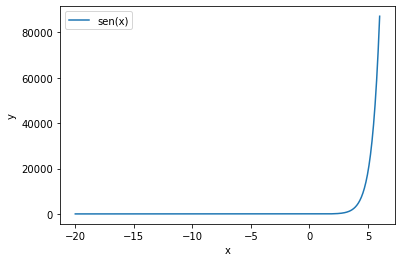

In [18]:
#Ejercicio 17
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
expr  = x**3 * sp.E**x
f17 = sp.Lambda(x, expr)
display(f17)
# Calculamos su dominio antes de hacer nada.

f=sp.Lambda(x, expr)
display(sp.calculus.singularities(f(x), x))

# Ahora procedemos a calcular los extremos relativos.
d1f = sp.diff(expr, x)
display('La derivada primera es: ',d1f)
print('Estos son los puntos donde la primera derivada es 0: ')
display(sp.solve(d1f))# Al resolver con el comando sp.solve la primera derivada, estamos mostrando los puntos donde esta valga 0.

#Ahora vamos a ver los intervalos de crecimiento y decrecimiento de la funcion sobre los puntos -3 y 0
display('En el intervalo de -oo a -3 la función decrece',d1f.subs(x,-4))
display('En el intervalo de -3 a 0 la función crece',d1f.subs(x,-2))
display('En el intervalo de 0 a oo la función crece',d1f.subs(x,1))

display('La funcion es creciente desde el -3 al oo')

# A continuación pasamos a calcular la concavidad/convexidad, empezando con la segunda derivada.
d2f = sp.diff(expr, x, 2)
display('La derivada segunda es: ',d2f)
print('Estos son los puntos donde la segunda derivada es 0: ')
display(sp.solve(d2f))

#Ahora vamos a ver los intervalos de concavidad y convexidad de la funcion
display('En el intervalo de -oo a -3-sp.sqrt(3) la función es concava',d2f.subs(x,-5))
display('En el intervalo de -3-sp.sqrt(3) a -3+sp.sqrt(3) la función es convexa ',d2f.subs(x,-2))
display('En el intervalo de -3+sp.sqrt(3) a 0 la función es concava ',d2f.subs(x,-1))
display('En el intervalo de 0 a oo la función es convexa ',d2f.subs(x,1))

print('La funcion en el intervalo que crece empieza siendo concava luego es convexa y termina siendo concava otra vez')

print('Aqui tenemos la representacion grafica')
# Creación de los puntos donde se evalúa la función
x = np.linspace(-20, 6, 400)

# Gráfica de sin(x) y cos(x), con una etiqueta para cada una
plt.plot(x, x**3 * sp.E**x, label='sen(x)')

# Etiquetas de los ejes
plt.xlabel('x')
plt.ylabel('y')

# Añadir la leyenda (mostrando las etiquetas de los "plot")
plt.legend()

plt.show()

Polinomio de Taylor: 
 -x**2/2 + x 

 Resto de Taylor: 
 x**3/(3*(t + 1)**3)


<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in log
  return log(x + 1)


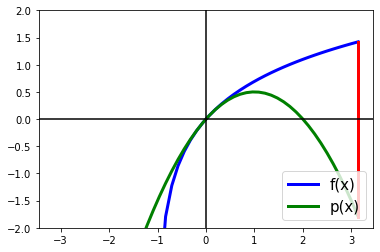

In [19]:
# Ejercico 24

import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
    R=(sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1))
    return p,R

# Codigo aqui                
import sympy as sp
x=sp.symbols('x')
f= sp.log(1+x)

p,R=taylor(f,0,2)
print('Polinomio de Taylor: \n',p,'\n\n Resto de Taylor: \n',R)

# Codigo aqui
import numpy as np
import matplotlib.pyplot as plt
x=sp.symbols('x')
fn=sp.lambdify(x,f)
pn=sp.lambdify(x,p)
x=np.linspace(-np.pi,np.pi)
plt.plot(x,fn(x),label='f(x)', lw='3',c='b')
plt.plot(x,pn(x),label='p(x)', lw='3',c='g')
plt.plot([np.pi,np.pi],[fn(np.pi),pn(np.pi)],lw='3',c='r')
plt.axhline(0,color='k')
plt.axvline(0,color='k')
plt.ylim(-2,2)
plt.legend(loc='lower right',fontsize=15)
plt.show()

In [20]:
# Ejercicio 24

import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
    R=(sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1))
    return p,R

# Codigo aqui                
import sympy as sp
x=sp.symbols('x')
f= sp.sin(x)

p,R=taylor(f,sp.pi/2,1)
print('Polinomio de Taylor: \n',p,'\n\n Resto de Taylor: \n',R)

Polinomio de Taylor: 
 1 

 Resto de Taylor: 
 -(x - pi/2)**2*sin(t)/2


In [21]:
# Ejercicio 25
import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
    R=(sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1))
    return p,R

# Codigo aqui                
import sympy as sp
x=sp.symbols('x')
f= sp.asin(x)

p,R=taylor(f,0,2)
print('Polinomio de Taylor: \n',p,'\n\n Resto de Taylor: \n',R)

Polinomio de Taylor: 
 x 

 Resto de Taylor: 
 x**3*(3*t**2/(1 - t**2) + 1)/(6*(1 - t**2)**(3/2))


In [ ]:
# EJERCICIOS COMPLEMENTARIOS

In [28]:
# Ejercicio 2
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = x**3 - x -1
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

N_max = 100
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 1

for k in range(1,N_max):
   if f_der(x_aprox[k-1]) == 0: break

   x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

   if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
print('\nAproximaciones', x_aprox[0:k+1])

Número de iteraciones realizadas:  6
Aproximación de la raíz:  1.324717957244746

Aproximaciones [1.         1.5        1.34782609 1.3252004  1.32471817 1.32471796
 1.32471796]


In [22]:
# Ejercicio 3
x,a,b = sp.symbols('x,a,b', real = True)
expr3 = (sp.sqrt(a*x + b)-2)/x
f = sp.Lambda(x,expr3)
display('f(x)', f(x))

# Aplicamos l'Hôpital para resolver el límite
expr_1 = (sp.sqrt(a*x + b)-2)
expr_2 = x

d1f = sp.diff(expr_1,x,1)
d1f_2 = sp.diff(expr_2,x,1)
display('Derivada primera del numerador',d1f)
display('Derivada primera del denominador',d1f_2)

print('\nSustituimos por 0 en el numerador:', d1f.subs(x,0))
print('\nSustituimos por 0 en el denominador:',d1f_2.subs(x,0))
print('\n')
expr_3 = d1f.subs(x,0)/d1f_2.subs(x,0)
display('Obtenemos la siguiente expresión:', expr_3)
expr_4 = sp.Eq(expr10_3,1)
sol_4 = sp.solve(expr_4)
print('Finalmente sabemos que el valor de a es λ, para λ ∈ R y que b =',sol_4[0])

'f(x)'

(sqrt(a*x + b) - 2)/x

'Derivada primera del numerador'

a/(2*sqrt(a*x + b))

'Derivada primera del denominador'

1


Sustituimos por 0 en el numerador: a/(2*sqrt(b))

Sustituimos por 0 en el denominador: 1




'Obtenemos la siguiente expresión:'

a/(2*sqrt(b))

IndexError: list index out of range

In [ ]:
# EJERCICIOS ANTERIORES 

In [23]:
# Ejercicio 1
# Definimos las funciones f1(t)=cos(t) y f2=raíz de t.

# a. Construye g(t) = f2(f1(t)). Obtén su dominio.

import sympy as sp 

t=sp.Symbol('t', real=True)
expr1=sp.cos(t)
expr2=sp.sqrt(t)
f1=sp.Lambda(t,expr1)
f2=sp.Lambda(t,expr2)
g= f2(f1(t))
display(g)
display(sp.calculus.singularities(g,t))
# Al obtener el conjunto vacío esto nos indica que el dominio de la función g es el conjunto de todos los números reales.


sqrt(cos(t))

EmptySet

In [24]:
# b. Estudia las simetrías de f1

# Para estudiar las simetrías de la función f1, estudiaremos primero la par y luego la impar.
# Para que n-una funcióne tenga simetría par: f(x)=f(-x)
# Para analizar esto vaos a emplear lo que llamamos una hipótesis sobre una variable, realizamos una serie de comparaciones/condiciones y dependiendo si se cumplen o no, tendremos un resultado u otro.

expr1=f1(t)
expr2=f1(-t)
print('La función f1 es par?', expr1==expr2)

# Al devolver true podemos afirmar que la función "f1" tiene siemtría par
# Para que una función tenga simetría impar: -f(x)=f(-x)

expr3=-f1(t)
expr4=f1(-t)
print('La función f1 tiene simetría impar?', expr3==expr4)

La función f1 es par? True
La función f1 tiene simetría impar? False


In [25]:
# c. Muestra el tipo de variable de las variables que has declarado.
print(type(t))
print(type(expr1))
print(type(expr2))
print(type(f1))
print(type(f2))
print(type(g))

<class 'sympy.core.symbol.Symbol'>
cos
cos
<class 'sympy.core.function.Lambda'>
<class 'sympy.core.function.Lambda'>
<class 'sympy.core.power.Pow'>


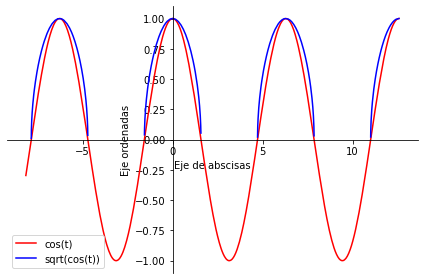

In [26]:
# EJERCICIO 2:
# Representar f1 y g
import sympy as sp

p = sp.plot(f1(t), g, (t, -3*sp.E, 4*sp.pi), show=False)
p[0].line_color='r'
p[1].line_color='b'
p.xlabel='Eje de abscisas'
p.ylabel='Eje ordenadas'
p.legend=True
p.show()

In [27]:
# Ejercicio 3

# Empezamos calculando el límite cuando g tiende a pi medios
# Para ello calculamos los límites y miramos si coinciden o no.

l1=display(sp.limit(g, t, sp.pi/2, dir='-'))
l2=display(sp.limit(g, t, sp.pi/2, dir='+'))
print('Existe el límite cuando x tiende a pi medios?',l1==l2)

# Ahora calcularemos el límite cuando x tiende a infinito.

l3=display(sp.limit(g, t, sp.oo, dir='-'))
l4=display(sp.limit(g, t, sp.oo, dir='+'))
print('Existe el límite cuando x tiende a infinito?', l3==l4)


0

0

Existe el límite cuando x tiende a pi medios? True


sqrt(AccumBounds(-1, 1))

sqrt(AccumBounds(-1, 1))

Existe el límite cuando x tiende a infinito? True
